In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from conv_ae_3d.metrics import dice_coefficient
from src.plotting_utils import write_isosurface_plot_from_arr
from src.evaluation.extract_num_components import compute_num_components, compute_surface_area_volume_ratio

In [2]:
# Conv AEs

In [3]:
run_base_dir = Path('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/yellowstone')
run_dirs = [run_base_dir / f'v3_{i}' for i in range(4)]

list(map(lambda x: x.exists(), run_dirs))

[True, True, True, True]

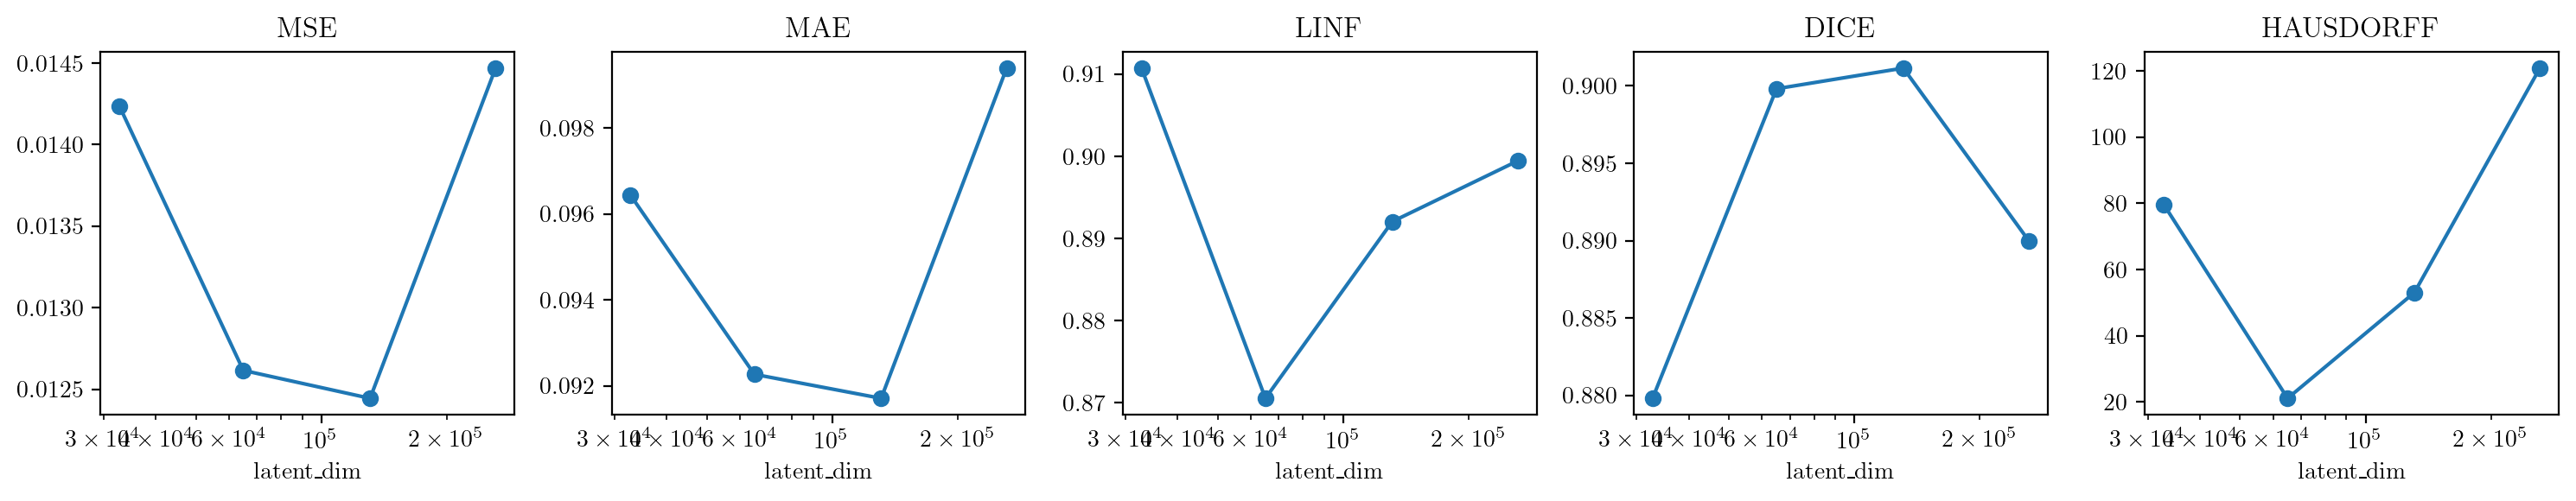

In [6]:
def plot_metrics_vs_latent_dim(run_dirs, epoch, xs, metrics):
    fig, axs = plt.subplots(1, len(metrics), figsize=(3*len(metrics), 3), dpi=200)
    
    for i, metric in enumerate(metrics):
        
        ys = []
    
        for run_dir in run_dirs:
            metric_path = run_dir / 'metrics' / f'val_metrics_{epoch}.csv'
            metric_df = pd.read_csv(metric_path).mean()
            ys.append(metric_df[metric])
            
        axs[i].plot(xs, ys, 'o-', label=metric)
        axs[i].set_xlabel('latent_dim')
        axs[i].set_title(metric)
        axs[i].set_xscale('log')
        
    fig.tight_layout()
    plt.show()
    
bottleneck_sizes = [262144, 131000, 65000, 32768]
plot_metrics_vs_latent_dim(run_dirs, 100, bottleneck_sizes, ['MSE', 'MAE', 'LINF', 'DICE', 'HAUSDORFF'])

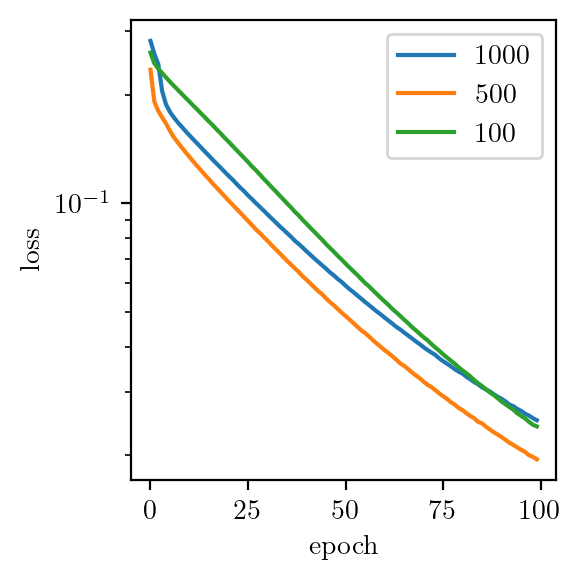

In [8]:
def plot_losses(run_dirs, bottleneck_sizes):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)
    
    for run_dir, bs in zip(run_dirs, bottleneck_sizes):
        loss_path = run_dir / 'loss_history.json'
        loss_df = pd.read_json(loss_path)
        ax.plot(loss_df.index, loss_df.iloc[:, 0], label=f'{bs}')
        
    ax.legend()
    ax.set_yscale('log')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    fig.tight_layout()
    plt.show()
    
plot_losses(run_dirs, bottleneck_sizes)

In [11]:
# TODO - write out isosurface plots for v3_3 data next

def write_isosurface_plots(run_dir):
    results_folder = run_dir / 'final_val_predictions'
    filepaths = list(results_folder.glob('*.npz'))
    
    assert len(filepaths) > 0, f"No files found in {results_folder}"
    
    for filepath in filepaths:
        data = np.load(filepath)
        data, pred = data['data'], data['pred']
        
        isosurface_folder = results_folder / "isosurface_plots"
        isosurface_folder.mkdir(exist_ok=True)
        
        write_isosurface_plot_from_arr(data,
                                       outname=isosurface_folder / f"{filepath.stem}_original.png",
                                       level=0.5,
                                       dx=256,
                                       verbose=True)
        
        write_isosurface_plot_from_arr(pred,
                                       outname=isosurface_folder / f"{filepath.stem}_reconstructed.png",
                                       level=0.5,
                                        dx=256,
                                       verbose=True)
        
#write_isosurface_plots(run_dirs[3])

In [4]:
def plot_metric_vs_num_components(run_dir):
    # TODO - for each metric, on each validation case, extract the number of components and the metric value, then plot average metric value vs number of components
    # Only plot a single metric
    # run_dir has the results for a single bottleneck size
    
    results_folder = run_dir / 'final_val_predictions'
    filepaths = list(results_folder.glob('*.npz'))
    num_components = []
    sigmas = []
    dice_vals = []

    assert len(filepaths) > 0, f"No files found in {results_folder}"

    for filepath in filepaths:
        data = np.load(filepath)
        data, pred = data['data'], data['pred']
        
        num_components.append(compute_num_components(data))
        sigmas.append(compute_surface_area_volume_ratio(data))
        dice_vals.append(dice_coefficient(data, pred))
        
        print(num_components[-1])
        
        
    fig, axs = plt.subplots(1, 2, figsize=(6, 3), dpi=200)
    
    ax = axs[0]
    ax.set_xlabel('Num components')
    ax.set_ylabel('Dice')
    ax.scatter(num_components, dice_vals)
    
    ax = axs[1]
    ax.set_xlabel('Sigma')
    ax.set_ylabel('Dice')
    ax.scatter(sigmas, dice_vals)
    
    fig.tight_layout()
    plt.show()
        
        
plot_metric_vs_num_components(run_dirs[0])  # TODO: re-create final val predictions from YS?


AssertionError: No files found in /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/yellowstone/v3_0/final_val_predictions

In [5]:
run_base_dir = Path('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/yellowstone')
run_dirs = [run_base_dir / f'v3_{i}' for i in range(4, 7)]

list(map(lambda x: x.exists(), run_dirs))

[True, True, True]

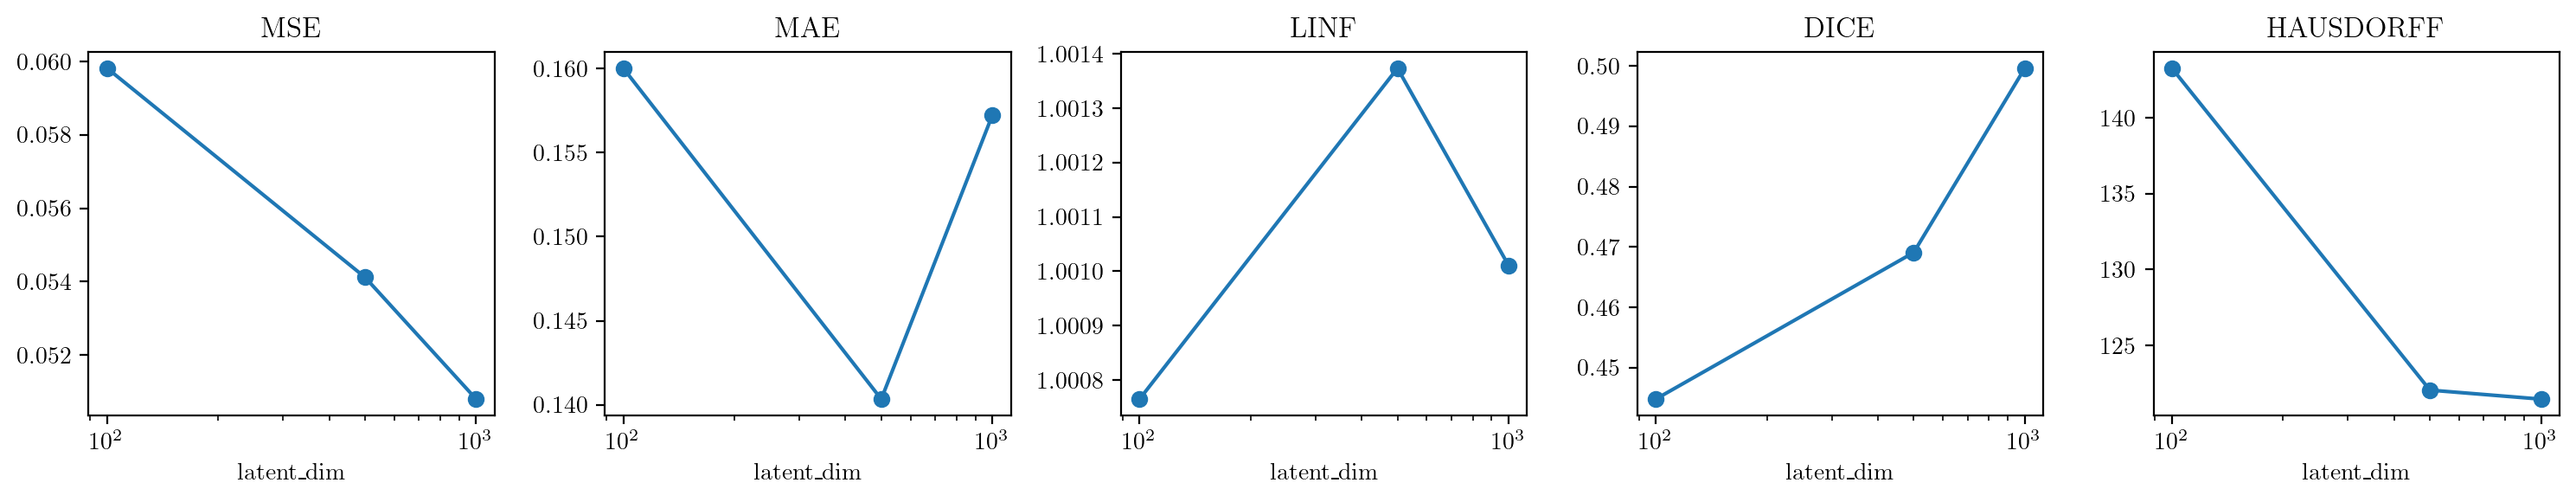

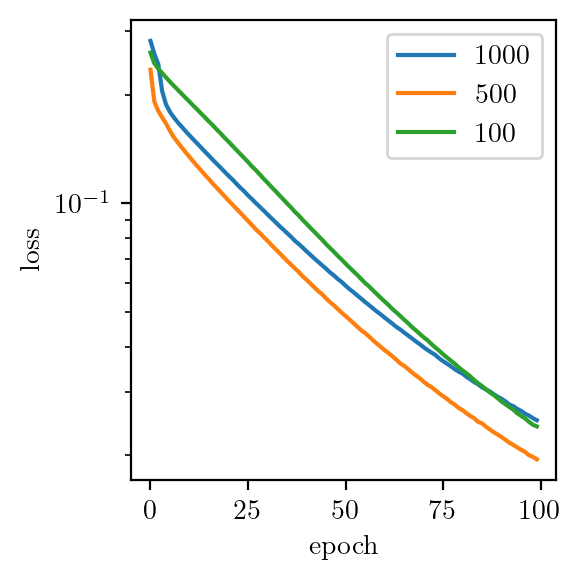

In [9]:
# Re-create plots above, but for linear bottlenecks

bottleneck_sizes = [1000, 500, 100]
plot_metrics_vs_latent_dim(run_dirs, 100, bottleneck_sizes, ['MSE', 'MAE', 'LINF', 'DICE', 'HAUSDORFF'])
plot_losses(run_dirs, bottleneck_sizes)

In [12]:
for run_dir in run_dirs:
    write_isosurface_plots(run_dir)

AssertionError: No files found in /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/yellowstone/v3_4/final_val_predictions